In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for beatiful visualizations
%matplotlib inline 
import scipy.stats as scs #for statistics
import operator
from scipy.stats import chi2_contingency
import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import *

In [3]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import LinearSVR,SVR
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib

In [4]:
import predictiveModelBuilding
from predictiveModelBuilding import PredictiveModelBuilding, final_job, convert_cat, build_final_dataset

In [4]:
import os
predictives_models = []
path = '../GradePredictorApp/app/static/classes/'
for filename in os.listdir(path):
    print '-------------before load--------------'
    model = joblib.load(path+filename)
    predictives_models.append(model)
    print '-------------after load--------------'

-------------before load--------------
-------------after load--------------
-------------before load--------------
-------------after load--------------
-------------before load--------------
-------------after load--------------
-------------before load--------------
-------------after load--------------
-------------before load--------------
-------------after load--------------
-------------before load--------------
-------------after load--------------
-------------before load--------------
-------------after load--------------


In [5]:
predictives_models

In [6]:
model_names = ['FM', 'FSTA', 'FD', 'FSDC', 'FSEG', 'FPSE', 'FT']

In [19]:
for dept, name in zip(predictives_models, model_names):
    if name =='FPSE':
        model=dept.predictive_models['Ridge']
        coefficients=sorted(zip(np.abs(model.coef_), dept.dataset_bin.columns), reverse=True)

In [20]:
coefficients

[(0.67804584662265144, 'zawadi ya raisi'),
 (0.18896536264584327, 'construction'),
 (0.1674369148229489, 'machine outil'),
 (0.15628053158582803, 'math-physique'),
 (0.15248416105945381, 'batiment'),
 (0.1252001454878067, 'electricite'),
 (0.12077723845223862, 'commerciale et administrative'),
 (0.12044189129895197, 'imprimerie'),
 (0.11767695020423589, 'nutr'),
 (0.11669727137178823, 'commerciale informatique'),
 (0.11627757409948371, 'bio-chimie'),
 (0.11162337723484428, 'secretariat'),
 (0.10713224017549226, 'industrielle'),
 (0.10387461632020416, 'nidunga'),
 (0.099085150737779459, 'latin philo'),
 (0.094262046593652046, 'itfm maendeleo'),
 (0.090004053106756216, 'mec gene'),
 (0.088676845912415023, 'isoko'),
 (0.084386075388452622, 'chidasa'),
 (0.082262248155338363, 'ID'),
 (0.076745999818391683, 'lumumba'),
 (0.075483879800241863, 'kirimavolo'),
 (0.07381929092086878, 'de la sucrerie de kiliba'),
 (0.073454621672016357, 'uhuru'),
 (0.072835862946494689, 'itig'),
 (0.072177393540

### Plot curves 

In [49]:
from sklearn import datasets 
X, y = datasets.make_regression(n_samples=1000,n_features=1,
                                n_informative=1,noise=15,
                                bias=1000,random_state=0)

In [4]:
X.shape

(1000, 1)

In [5]:
y.shape

(1000,)

In [51]:
learning_rate = alpha = 0.01                                                                    
iters = 1000      

def linear_cost(theta,X,y):                                                     
    m = y.shape[0]                                                              
    return 1. / (2. * m) * np.sum((np.dot(X, theta) - y) ** 2.)                            
                                                                                
def linear_cost_grad(theta,X,y):                                                
    m = y.shape[0]                                                              
    return 1. / m * np.dot(X.T, (y - np.dot(X,theta)))                                 
                                                                                
def gradient_descent(X,y,alpha,iters):                                    
    m = y.shape[0]                                                              
    all_cost = []
    #Initialize theta to zeros
    all_theta = [np.zeros((X.shape[1],1))]
    for i in range(iters):                                                      
        all_cost.append(linear_cost(all_theta[-1], X, y))
        all_theta.append(all_theta[-1] + float(alpha) * linear_cost_grad(all_theta[-1], X, y))                       
    return all_theta,all_cost                                                       
                                                                             
#Perform linear regression via gradient descent                                
all_theta, all_cost = gradient_descent(X, y, alpha, iters)

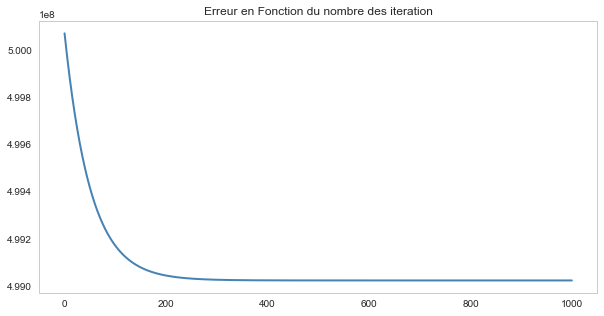

In [52]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig=plt.figure(figsize=(10,5))
plt.plot(all_cost, color='steelblue',linewidth=2)
plt.title('Erreur en Fonction du nombre des iteration')

In [53]:
fig.savefig('../../FinalYearProjectReport/fig/Cost_vs_iterations.png',dpi=100)

In [14]:
fig.show()

/Users/espyMur/Desktop/Memory-WorkingDir/memoryVenv/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


closed_form_best_thetas = np.linalg.pinv(np.dot(X.T, X)).dot(X.T).dot(y)
fig=plt.figure()
plt.grid()
plt.scatter(X[:, 1], y, color='darkred', edgecolor='none')
plt.plot(X[:, 1], np.dot(X, closed_form_best_thetas), color='steelblue')
plt.title('Gradient regression')

In [23]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [27]:
fig.savefig('../../FinalYearProjectReport/fig/linear_regression_1.png',dpi=100)

#### Logistic Rgression Boundary

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [35]:
from scipy.stats import logistic

data genreattion

In [17]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

In [19]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

[(-5, 5),
 (-5, 5),
 None]

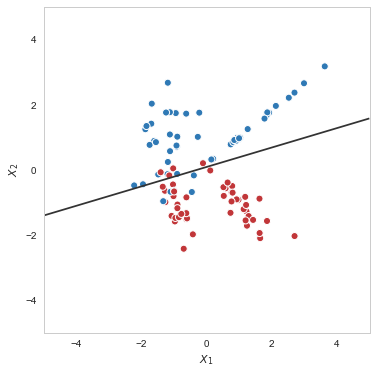

In [21]:
sns.set_style("whitegrid", {'axes.grid' : False})
f, ax = plt.subplots(figsize=(8, 6),)
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [22]:
f.savefig('../../FinalYearProjectReport/fig/DecisionBoudary.png')

In [26]:
x=np.linspace(start=-3,stop=3,num=50)

In [29]:
ax.plot(x,y)

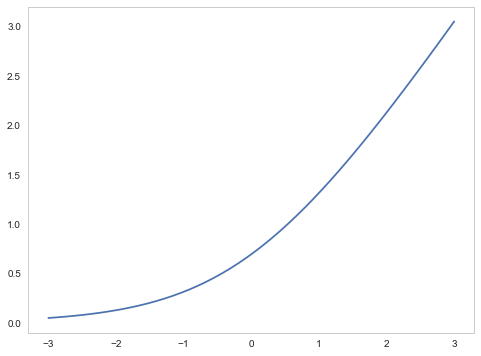

In [41]:
sns.set_style("whitegrid", {'axes.grid' : False})
f, ax = plt.subplots(figsize=(8, 6),)
ax.plot(x,-np.log(1-logistic.cdf(x)))

In [42]:
f.savefig('../../FinalYearProjectReport/fig/ErreurRegressionLogistique2.png')